In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, auc, roc_curve
import itertools
import yaml
import os
import numpy as np
from statistics import mean
from IPython.display import clear_output
from datetime import datetime, timedelta
import time
from sklearn.metrics import precision_recall_curve, auc
pd.options.display.max_rows = 999

In [2]:
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title='Matriz de Confusión',
                          cmap=plt.cm.Blues):
    """
    Esta función imprime y plotea la matriz de confusión.
    La normalización se puede aplicar configurando `normalize=True`.
    """
    cm = confusion_matrix(y_true, y_pred)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.figure(figsize=(6, 4))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('Etiqueta Verdadera')
    plt.xlabel('Etiqueta Predicha')
    plt.tight_layout()

In [3]:
with open('configs/project_config.yml', 'r') as archivo:
    config = yaml.safe_load(archivo)

initial_wallet_value = config['start_money']


In [4]:
path = 'Mode_train-Model_gradient_boosting-TrainWw_1440-TrainPd_24-TradingStgy_ml_strategy-PeriodsFwTg_24-SL_10-RR_5-UseDaysClose_True'
orders = pd.read_csv(os.path.join('./backbone/data/backtest/experiments', path, 'orders.csv'))
wallet = pd.read_csv(os.path.join('./backbone/data/backtest/experiments', path, 'wallet.csv'))


In [5]:
orders.head(50)

,id,ticker,operation_type,open_time,close_time,open_price,last_price,close_price,profit,stop_loss,take_profit,units,profit_in_pips,comment
0,600a37f3-2fa5-11ef-8208-958c92a01fe8,EURUSD,OperationType.BUY,2023-01-03 05:00:00,2023-01-03 07:00:00,1.06724,1.06724,1.06624,-10.000,1.06624,1.07224,10000,-0.001,ClosePositionType.STOP_LOSS
1,60229180-2fa5-11ef-a499-958c92a01fe8,EURUSD,OperationType.SELL,2023-01-03 09:00:00,2023-01-03 10:00:00,1.06234,1.06234,1.05734,49.500,1.06334,1.05734,9900,0.005,ClosePositionType.TAKE_PROFIT
2,60764064-2fa5-11ef-b5d8-958c92a01fe8,EURUSD,OperationType.BUY,2023-01-03 11:00:00,2023-01-03 12:00:00,1.05476,1.05476,1.05376,-10.395,1.05376,1.05976,10395,-0.001,ClosePositionType.STOP_LOSS
3,6087cb5f-2fa5-11ef-9817-958c92a01fe8,EURUSD,OperationType.BUY,2023-01-03 13:00:00,2023-01-03 16:00:00,1.05285,1.05285,1.05785,51.455,1.05185,1.05785,10291,0.005,ClosePositionType.TAKE_PROFIT
4,617385b4-2fa5-11ef-8a8a-958c92a01fe8,EURUSD,OperationType.SELL,2023-01-05 07:00:00,2023-01-05 10:00:00,1.06106,1.06106,1.06206,-10.806,1.06206,1.05606,10806,-0.001,ClosePositionType.STOP_LOSS
5,6198deab-2fa5-11ef-970d-958c92a01fe8,EURUSD,OperationType.SELL,2023-01-05 14:00:00,2023-01-05 16:00:00,1.05995,1.05995,1.05495,53.490,1.06095,1.05495,10698,0.005,ClosePositionType.TAKE_PROFIT
6,61ac9d09-2fa5-11ef-927e-958c92a01fe8,EURUSD,OperationType.BUY,2023-01-05 18:00:00,2023-01-06 07:00:00,1.05211,1.05211,1.05111,-11.232,1.05111,1.05711,11232,-0.001,ClosePositionType.STOP_LOSS
7,623f9224-2fa5-11ef-96c9-958c92a01fe8,EURUSD,OperationType.SELL,2023-01-06 15:00:00,2023-01-06 17:00:00,1.05426,1.05426,1.05526,-11.120,1.05526,1.04926,11120,-0.001,ClosePositionType.STOP_LOSS
8,62d1a2d5-2fa5-11ef-bb61-958c92a01fe8,EURUSD,OperationType.SELL,2023-01-09 13:00:00,2023-01-09 15:00:00,1.06843,1.06843,1.06943,-11.009,1.06943,1.06343,11009,-0.001,ClosePositionType.STOP_LOSS
9,62e226ca-2fa5-11ef-80fe-958c92a01fe8,EURUSD,OperationType.BUY,2023-01-09 16:00:00,2023-01-10 14:00:00,1.07282,1.07282,1.07182,-10.899,1.07182,1.07782,10899,-0.001,ClosePositionType.STOP_LOSS


In [6]:
orders = orders.sort_values(by='close_time')

# Cantidad de compras y ventas

In [7]:
orders.operation_type.value_counts()

operation_type
OperationType.BUY     174
OperationType.SELL    149
Name: count, dtype: int64

# Compras que salieron bien

In [8]:
orders[(orders['operation_type']=='OperationType.BUY') & (orders['profit']>0)].shape[0] / orders[(orders['operation_type']=='OperationType.BUY')].shape[0] 

0.25287356321839083

# Ventas que salieron bien

In [9]:
orders[(orders['operation_type']=='OperationType.SELL') & (orders['profit']>0)].shape[0] / orders[(orders['operation_type']=='OperationType.SELL')].shape[0] 

0.19463087248322147

# Cierres por SL y TP

In [10]:
orders.comment.value_counts()

comment
ClosePositionType.STOP_LOSS      250
ClosePositionType.TAKE_PROFIT     73
Name: count, dtype: int64

In [11]:
# orders[(orders['comment']=='ClosePositionType.DAYS') & (orders['profit']>=0)].shape[0] / orders[(orders['comment']=='ClosePositionType.DAYS')].shape[0]

# Cierres por SL que terminaron positivos

In [12]:
orders[(orders['comment']=='ClosePositionType.STOP_LOSS') & (orders['profit']>=0)].shape[0] / orders[(orders['comment']=='ClosePositionType.STOP_LOSS')].shape[0]

0.0

# Cierres por SL en que se minimizaron las perdidas

In [13]:
orders[(orders['comment']=='ClosePositionType.STOP_LOSS') & (orders['last_price']!=orders['open_price'])].shape[0] / orders[(orders['comment']=='ClosePositionType.STOP_LOSS')].shape[0]

0.0

# Desempenio por ticker

In [14]:
orders_by_ticker = orders.groupby('ticker').agg(
    positivas=('profit', lambda x: (x > 0).sum()),
    negativas=('profit', lambda x: (x < 0).sum()),
    profit=('profit', lambda x: (x).sum()),
).reset_index()

orders_by_ticker['perc'] = (orders_by_ticker['positivas'] / (orders_by_ticker['positivas'] + orders_by_ticker['negativas'])) * 100
orders_by_ticker.sort_values(by='perc', ascending=False)

,ticker,positivas,negativas,profit,perc
0,EURUSD,73,250,1855.058,22.600619


# Rendimiento por mes

In [15]:
orders_per_month = orders[['close_time','profit', 'comment']].copy()
orders_per_month['close_time'] = pd.to_datetime(orders_per_month['close_time'])
orders_per_month['year'] = orders_per_month['close_time'].dt.year
orders_per_month['month'] = orders_per_month['close_time'].dt.month
orders_per_month['day'] = orders_per_month['close_time'].dt.day


orders_per_month_gb = orders_per_month.groupby(by=['year','month']).agg(
    amount_ops=('profit', 'count'),
    good_ops=('profit', lambda x: (x > 0).sum()),
    bad_ops=('profit', lambda x: (x < 0).sum()),
    take_profit=('comment', lambda x: (x == 'ClosePositionType.TAKE_PROFIT').sum()),
    stop_loss=('comment', lambda x: (x == 'ClosePositionType.STOP_LOSS').sum()),
    profit_sum=('profit', 'sum'),
    max_profit=('profit', 'max'),

).reset_index()

orders_per_month_gb = pd.concat([
    pd.DataFrame({'year':[2023], 'month':[0],'amount_ops':[0], 'profit_sum':[initial_wallet_value]}), 
    orders_per_month_gb
])

orders_per_month_gb['profit_cumsum'] = orders_per_month_gb['profit_sum'].cumsum()

orders_per_month_gb['perc_change'] = ((orders_per_month_gb['profit_cumsum'] - orders_per_month_gb['profit_cumsum'].shift(1)) / orders_per_month_gb['profit_cumsum'].shift(1))

orders_per_month_gb['perc_change'] = orders_per_month_gb['perc_change'].round(3)

orders_per_month_gb['perc_good_ops'] = (orders_per_month_gb['good_ops'] / orders_per_month_gb['amount_ops'])

orders_per_month_gb[[
    'year', 
    'month', 
    'amount_ops', 
    'take_profit',
    'stop_loss',
    'good_ops', 
    'bad_ops',
    'perc_good_ops',
    'max_profit', 
    'profit_sum', 
    'profit_cumsum', 
    'perc_change', 
]].round(3)

,year,month,amount_ops,take_profit,stop_loss,good_ops,bad_ops,perc_good_ops,max_profit,profit_sum,profit_cumsum,perc_change
0,2023,0,0,NaN,NaN,NaN,NaN,NaN,NaN,1000.000,1000.000,NaN
0,2023,1,32,8.0,24.0,8.0,24.0,0.250,55.275,160.799,1160.799,0.161
1,2023,2,26,6.0,20.0,6.0,20.0,0.231,61.815,111.516,1272.315,0.096
2,2023,3,34,7.0,27.0,7.0,27.0,0.206,66.980,92.487,1364.802,0.073
3,2023,4,18,6.0,12.0,6.0,12.0,0.333,77.200,256.363,1621.165,0.188
4,2023,5,31,7.0,24.0,7.0,24.0,0.226,85.345,171.078,1792.243,0.106
5,2023,6,26,11.0,15.0,11.0,15.0,0.423,130.690,844.133,2636.376,0.471
6,2023,7,30,4.0,26.0,4.0,26.0,0.133,126.625,-168.749,2467.627,-0.064
7,2023,8,27,7.0,20.0,7.0,20.0,0.259,140.990,372.316,2839.943,0.151
8,2023,9,21,4.0,17.0,4.0,17.0,0.190,143.015,69.876,2909.819,0.025


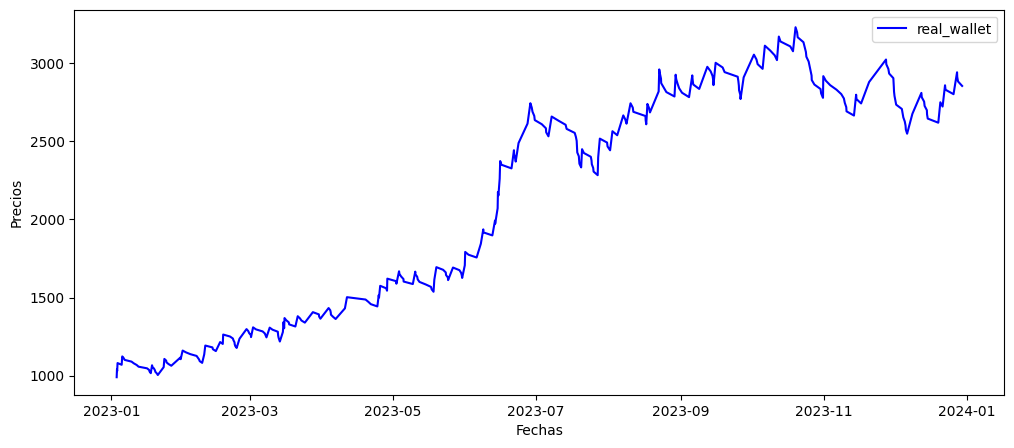

In [16]:
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots(figsize=(12, 5))

# Datos de ejemplo
x_wallet = pd.to_datetime(wallet['date'])
y_wallet = wallet['wallet']  # Datos para la línea
# Crear una figura y ejes
# Agregar la línea
ax.plot(x_wallet, y_wallet, label='real_wallet', color='blue')

# Etiquetas de los ejes y leyenda
ax.set_xlabel('Fechas')
ax.set_ylabel('Precios')
ax.legend()

# Mostrar el gráfico
plt.show()


In [17]:
orders_per_month_gb.perc_change.mean()

0.0990833333333333

In [18]:
orders_per_month_gb.perc_change.std()

0.14139979319345383

In [19]:
change_percent = orders_per_month_gb.perc_change.reset_index().copy().drop(columns='index')
change_percent.fillna(0, inplace=True)

# Inicializar el valor de partida
initial_value = 3000

# Crear una columna para la suma acumulada
change_percent['cumulative_sum'] = initial_value

# Calcular la suma acumulada basada en los porcentajes
for i in range(1, len(change_percent)):
    change_percent.loc[i, 'cumulative_sum'] = change_percent.loc[i-1, 'cumulative_sum'] * (1 + change_percent.loc[i, 'perc_change'])

change_percent

,perc_change,cumulative_sum
0,0.000,3000.000000
1,0.161,3483.000000
2,0.096,3817.368000
3,0.073,4096.035864
4,0.188,4866.090606
5,0.106,5381.896211
6,0.471,7916.769326
7,-0.064,7410.096089
8,0.151,8529.020599
9,0.025,8742.246114


# Rendimiento por dia

In [20]:
orders_per_month_gb = orders_per_month.groupby(by=['year','month', 'day']).agg(
    amount_ops=('profit', 'count'),
    good_ops=('profit', lambda x: (x > 0).sum()),
    bad_ops=('profit', lambda x: (x < 0).sum()),
    take_profit=('comment', lambda x: (x == 'ClosePositionType.TAKE_PROFIT').sum()),
    stop_loss=('comment', lambda x: (x == 'ClosePositionType.STOP_LOSS').sum()),
    profit_sum=('profit', 'sum'),
    max_profit=('profit', 'max'),

).reset_index()

orders_per_month_gb = pd.concat([
    pd.DataFrame({'year':[2023], 'month':[0], 'day':[0], 'amount_ops':[0], 'profit_sum':[initial_wallet_value]}), 
    orders_per_month_gb
])

orders_per_month_gb['profit_cumsum'] = orders_per_month_gb['profit_sum'].cumsum()

orders_per_month_gb['perc_change'] = ((orders_per_month_gb['profit_cumsum'] - orders_per_month_gb['profit_cumsum'].shift(1)) / orders_per_month_gb['profit_cumsum'])

orders_per_month_gb['perc_change'] = orders_per_month_gb['perc_change'].round(3)

orders_per_month_gb['perc_good_ops'] = (orders_per_month_gb['good_ops'] / orders_per_month_gb['amount_ops']) * 100

orders_per_month_gb = orders_per_month_gb[[
    'year', 
    'month', 
    'amount_ops', 
    'take_profit',
    'stop_loss',
    'good_ops', 
    'bad_ops',
    'perc_good_ops',
    'max_profit', 
    'profit_sum', 
    'profit_cumsum', 
    'perc_change', 
]].round(3)

orders_per_month_gb[orders_per_month_gb['month']==2]

,year,month,amount_ops,take_profit,stop_loss,good_ops,bad_ops,perc_good_ops,max_profit,profit_sum,profit_cumsum,perc_change
18,2023,2,1,0.0,1.0,0.0,1.0,0.0,-11.608,-11.608,1149.191,-0.010
19,2023,2,1,0.0,1.0,0.0,1.0,0.0,-11.492,-11.492,1137.699,-0.010
20,2023,2,2,0.0,2.0,0.0,2.0,0.0,-11.263,-22.640,1115.059,-0.020
21,2023,2,2,0.0,2.0,0.0,2.0,0.0,-11.039,-22.190,1092.869,-0.020
22,2023,2,1,0.0,1.0,0.0,1.0,0.0,-10.929,-10.929,1081.940,-0.010
23,2023,2,1,1.0,0.0,1.0,0.0,100.0,54.095,54.095,1136.035,0.048
24,2023,2,1,1.0,0.0,1.0,0.0,100.0,56.800,56.800,1192.835,0.048
25,2023,2,2,0.0,2.0,0.0,2.0,0.0,-11.809,-23.737,1169.098,-0.020
26,2023,2,1,0.0,1.0,0.0,1.0,0.0,-11.691,-11.691,1157.407,-0.010
27,2023,2,1,1.0,0.0,1.0,0.0,100.0,57.870,57.870,1215.277,0.048


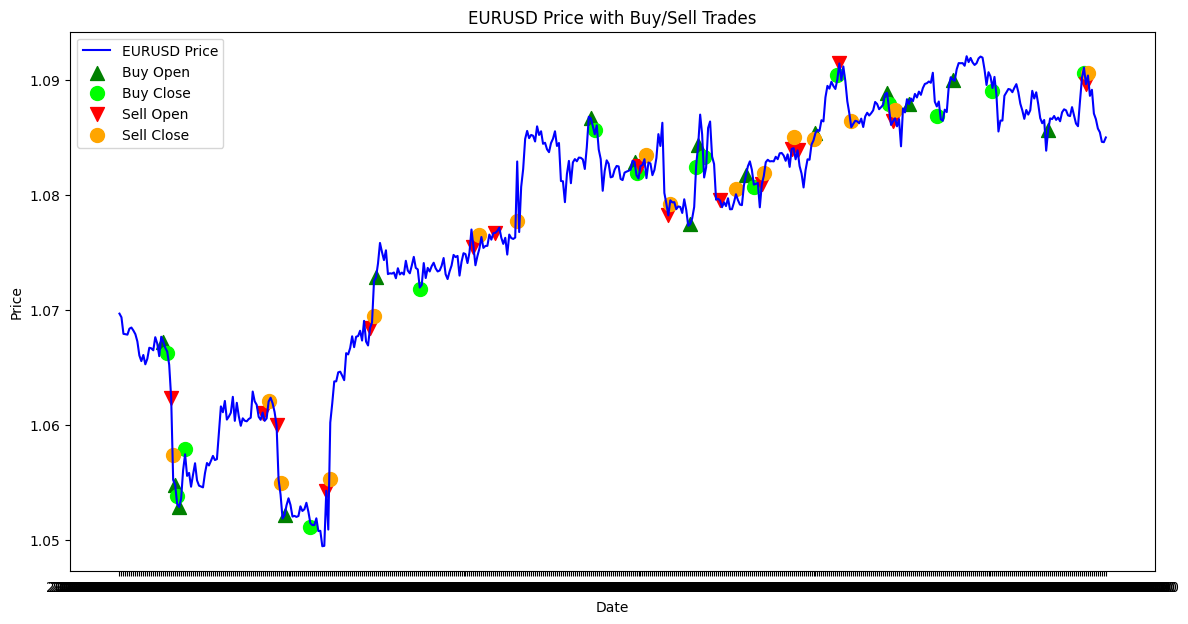

2023-01-01 2023-01-31


KeyboardInterrupt: Interrupted by user

In [21]:
ticker = 'EURUSD'
date_from = datetime(2023,1,1)
date_to = date_from + timedelta(days=30)

while date_to < datetime(2024,1,1):
    date_from_str = date_from.strftime('%Y-%m-%d')
    date_to_str = date_to.strftime('%Y-%m-%d')

    historical_prices = pd.read_csv(f'./backbone/data/backtest/symbols/{ticker}.csv')
    
    historical_prices = historical_prices[
        (historical_prices['Date']>date_from_str)
        & (historical_prices['Date']<date_to_str)
    ]
    
    plt.figure(figsize=(14, 7))
    plt.plot(historical_prices['Date'], historical_prices['Close'], label='EURUSD Price', color='blue')
    
    # Añadir las operaciones de compra y venta
    buy_trades = orders[
        (orders['operation_type']=='OperationType.BUY') 
        & (orders['close_time']>date_from_str)
        & (orders['close_time']<date_to_str)
        & (orders['ticker']==ticker)
    ]
    sell_trades = orders[
        (orders['operation_type']=='OperationType.SELL') 
        & (orders['close_time']>date_from_str)
        & (orders['close_time']<date_to_str)
        & (orders['ticker']==ticker)
    ]
    
    # Graficar las operaciones de compra
    plt.scatter(buy_trades['open_time'], buy_trades['open_price'], color='green', marker='^', s=100, label='Buy Open')
    plt.scatter(buy_trades['close_time'], buy_trades['close_price'], color='lime', marker='o', s=100, label='Buy Close')
    
    # Graficar las operaciones de venta
    plt.scatter(sell_trades['open_time'], sell_trades['open_price'], color='red', marker='v', s=100, label='Sell Open')
    plt.scatter(sell_trades['close_time'], sell_trades['close_price'], color='orange', marker='o', s=100, label='Sell Close')
    
    # Añadir etiquetas y leyenda
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.title('EURUSD Price with Buy/Sell Trades')
    plt.legend()
    
    # Mostrar el gráfico
    plt.show()
    
    print(date_from_str, date_to_str)
   
    a = input()
    
    clear_output(wait=True)

    date_from += timedelta(days=7)
    date_to = date_from + timedelta(days=15)


In [22]:
orders_per_month = orders[['close_time','comment', 'ticker', 'profit']].copy()
orders_per_month['close_time'] = pd.to_datetime(orders_per_month['close_time'])
orders_per_month['year'] = orders_per_month['close_time'].dt.year
orders_per_month['month'] = orders_per_month['close_time'].dt.month
orders_per_month['day'] = orders_per_month['close_time'].dt.day

orders_per_month_gb = orders_per_month.groupby(by=['year','month', 'day']).agg(
    take_profit=('comment', lambda x: (x == 'ClosePositionType.TAKE_PROFIT').sum()),
    stop_loss=('comment', lambda x: (x == 'ClosePositionType.STOP_LOSS').sum()),
    profit=('profit', lambda x: (x).sum()),

)

orders_per_month_gb['tp_cumsum'] = orders_per_month_gb.groupby(by=['year','month'])['take_profit'].cumsum()
orders_per_month_gb['sl_cumsum'] = orders_per_month_gb.groupby(by=['year','month'])['stop_loss'].cumsum()
orders_per_month_gb['profit_cumsum'] = orders_per_month_gb.groupby(by=['year','month'])['profit'].cumsum()
orders_per_month_gb

take_profit  stop_loss   profit  tp_cumsum  sl_cumsum  \
year month day                                                          
2023 1     3              2          2   80.560          2          2   
           5              1          1   42.684          3          3   
           6              0          2  -22.352          3          5   
           9              0          1  -11.009          3          6   
           10             0          1  -10.899          3          7   
           11             0          1  -10.790          3          8   
           12             0          1  -10.682          3          9   
           16             0          1  -10.575          3         10   
           17             0          3  -31.095          3         13   
           18             1          1   40.124          4         14   
           19             0          3  -31.364          4         17   
           20             0          2  -20.390          4         19   
           23             2          0  102.930          6         19   
           24             0          2  -22.032          6         21   
           25             0          1  -10.851          6         22   
           26             0          1  -10.743          6         23   
           30             1          1   42.008          7         24   
           31             1          0   55.275          8         24   
     2     1              0          1  -11.608          0          1   
           3              0          1  -11.492          0          2   
           6              0          2  -22.640          0          4   
           7              0          2  -22.190          0          6   
           8              0          1  -10.929          0          7   
           9              1          0   54.095          1          7   
           10             1          0   56.800          2          7   
           13             0          2  -23.737          2          9   
           14             0          1  -11.691          2         10   
           16             1          0   57.870          3         10   
           17             1          1   48.002          4         11   
           20             0          1  -12.633          4         12   
           21             0          1  -12.506          4         13   
           22             0          4  -48.788          4         17   
           23             0          1  -11.894          4         18   
           24             1          0   58.875          5         18   
           27             1          0   61.815          6         18   
           28             0          2  -25.833          6         20   
     3     1              0          2  -25.319          0          2   
           2              1          0   62.350          1          2   
           3              0          1  -13.093          1          3   
           6              0          1  -12.963          1          4   
           7              0          2  -25.538          1          6   
           8              0          1  -12.578          1          7   
           9              1          0   62.260          2          7   
           10             0          1  -13.074          2          8   
           13             0          6  -75.746          2         14   
           15             3          3  150.181          5         17   
           16             0          1  -13.688          5         18   
           17             0          2  -26.967          5         20   
           20             0          1  -13.281          5         21   
           21             1          0   65.745          6         21   
           22             0          1  -13.806          6         22   
           23             0          1  -13.668          6         23   
           24             0          1  -13.531          6         24   
 

# Que hubiera pasado si no se operaba con algunos tickers?

In [ ]:
tickers_permitidos = orders_by_ticker[orders_by_ticker['profit']>0].ticker.unique()
print(tickers_permitidos)

# tickers_permitidos = [
#     'EURUSD', 
#     'GBPUSD', 
#     'USDJPY', 
#     'USDCAD', 
#     'AUDUSD', 
#     'USDCHF'
# ]

orders_min = orders_per_month[orders_per_month['ticker'].isin(tickers_permitidos)].copy().reset_index()

# Rendimiento por mes

In [ ]:
orders_per_month_gb = orders_min.groupby(by=['year','month', 'day']).agg(
    amount_ops=('profit', 'count'),
    good_ops=('profit', lambda x: (x > 0).sum()),
    bad_ops=('profit', lambda x: (x < 0).sum()),
    take_profit=('comment', lambda x: (x == 'ClosePositionType.TAKE_PROFIT').sum()),
    stop_loss=('comment', lambda x: (x == 'ClosePositionType.STOP_LOSS').sum()),
    profit_sum=('profit', 'sum'),
    max_profit=('profit', 'max'),

).reset_index()

orders_per_month_gb = pd.concat([
    pd.DataFrame({'year':[2023], 'month':[0], 'day':[0], 'amount_ops':[0], 'profit_sum':[initial_wallet_value]}), 
    orders_per_month_gb
])

orders_per_month_gb['profit_cumsum'] = orders_per_month_gb['profit_sum'].cumsum()

orders_per_month_gb['perc_change'] = ((orders_per_month_gb['profit_cumsum'] - orders_per_month_gb['profit_cumsum'].shift(1)) / orders_per_month_gb['profit_cumsum'])

orders_per_month_gb['perc_change'] = orders_per_month_gb['perc_change'].round(3)

orders_per_month_gb['perc_good_ops'] = (orders_per_month_gb['good_ops'] / orders_per_month_gb['amount_ops']) * 100

orders_per_month_gb = orders_per_month_gb[[
    'year', 
    'month', 
    'amount_ops', 
    'take_profit',
    'stop_loss',
    'good_ops', 
    'bad_ops',
    'perc_good_ops',
    'max_profit', 
    'profit_sum', 
    'profit_cumsum', 
    'perc_change', 
]].round(3)

orders_per_month_gb[orders_per_month_gb['month']==2]

In [ ]:
orders_min['wallet'] = orders_min['profit']
orders_min.loc[0, 'wallet'] = initial_wallet_value + orders_min.iloc[0]['profit']
orders_min['wallet'] = orders_min['wallet'].cumsum()

In [ ]:
orders_by_ticker = orders_min.groupby('ticker').agg(
    positivas=('profit', lambda x: (x > 0).sum()),
    negativas=('profit', lambda x: (x < 0).sum()),
    profit=('profit', lambda x: (x).sum()),
).reset_index()

orders_by_ticker['perc'] = orders_by_ticker['positivas'] / (orders_by_ticker['positivas'] + orders_by_ticker['negativas'])
orders_by_ticker.sort_values(by='perc', ascending=False)

In [ ]:
orders_min[(orders_min['comment']=='ClosePositionType.STOP_LOSS') & (orders_min['profit']>=0)].shape[0] / orders_min[(orders_min['comment']=='ClosePositionType.STOP_LOSS')].shape[0]

In [ ]:
import matplotlib.pyplot as plt
import numpy as np


# Datos de ejemplo
x_wallet = pd.to_datetime(orders_min['close_time'])
y_wallet = orders_min['wallet']  # Datos para la línea
# Crear una figura y ejes
fig, ax = plt.subplots(figsize=(20, 10))
# Agregar la línea
ax.plot(x_wallet, y_wallet, label='simulated_wallet', color='red')



# Datos de ejemplo
x_wallet = pd.to_datetime(wallet['date'])
y_wallet = wallet['wallet']  # Datos para la línea
# Crear una figura y ejes
# Agregar la línea
ax.plot(x_wallet, y_wallet, label='real_wallet', color='blue')

# Etiquetas de los ejes y leyenda
ax.set_xlabel('Fechas')
ax.set_ylabel('Precios')
ax.legend()

# Mostrar el gráfico
plt.show()


In [23]:
true_values = pd.read_csv(os.path.join('./backbone/data/backtest/experiments', path, 'trainres.csv'))
predictions = pd.read_csv(os.path.join('./backbone/data/backtest/experiments', path, 'test_res.csv')).dropna()

In [24]:
predictions

,y_true,y_pred,proba
3,1.0,0.0,0.514719
22,0.0,1.0,0.500932
26,1.0,1.0,0.522613
27,0.0,1.0,0.506141
28,0.0,1.0,0.505070
...,...,...,...
6198,0.0,0.0,0.564878
6200,0.0,0.0,0.521777
6201,1.0,0.0,0.552247
6202,0.0,1.0,0.518643


In [25]:
from sklearn.metrics import f1_score, make_scorer, precision_score, recall_score, classification_report


precision = precision_score(predictions.y_true, predictions.y_pred, average='weighted')
recall = recall_score(predictions.y_true, predictions.y_pred, average='weighted')
f1 = f1_score(predictions.y_true, predictions.y_pred, average='weighted')

print(precision)
print(recall)
print(f1)

0.6186430678039855
0.4602446483180428
0.49183309216050264


In [26]:
print(classification_report(predictions['y_true'], predictions['y_pred']))

              precision    recall  f1-score   support

         0.0       0.74      0.43      0.54       979
         1.0       0.25      0.56      0.34       329

    accuracy                           0.46      1308
   macro avg       0.50      0.49      0.44      1308
weighted avg       0.62      0.46      0.49      1308



<Axes: >

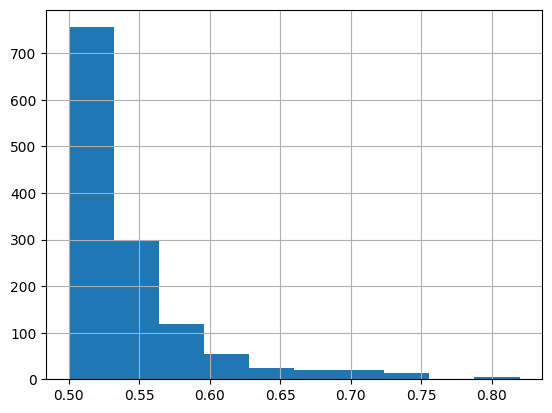

In [27]:
predictions.proba.hist()

              precision    recall  f1-score   support

         0.0       0.74      0.43      0.54       979
         1.0       0.25      0.56      0.34       329

    accuracy                           0.46      1308
   macro avg       0.50      0.49      0.44      1308
weighted avg       0.62      0.46      0.49      1308

Confusion Matrix
[[417 562]
 [144 185]]


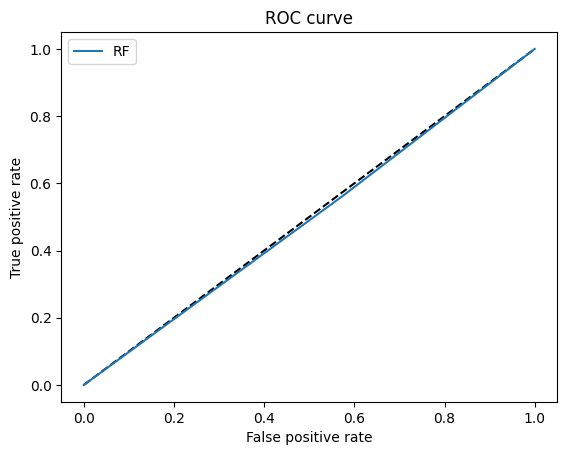

In [28]:
fpr_rf, tpr_rf, _ = roc_curve(predictions['y_true'], predictions['y_pred'])
print(classification_report(predictions['y_true'], predictions['y_pred']))

print("Confusion Matrix")
print(confusion_matrix(predictions['y_true'], predictions['y_pred']))

plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_rf, tpr_rf, label='RF')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

In [29]:
predictions['binary_pred'] = np.where(
    (predictions['y_pred']==0), 
    1 - predictions['proba'], 
    predictions['proba']
)

predictions

,y_true,y_pred,proba,binary_pred
3,1.0,0.0,0.514719,0.485281
22,0.0,1.0,0.500932,0.500932
26,1.0,1.0,0.522613,0.522613
27,0.0,1.0,0.506141,0.506141
28,0.0,1.0,0.505070,0.505070
...,...,...,...,...
6198,0.0,0.0,0.564878,0.435122
6200,0.0,0.0,0.521777,0.478223
6201,1.0,0.0,0.552247,0.447753
6202,0.0,1.0,0.518643,0.518643


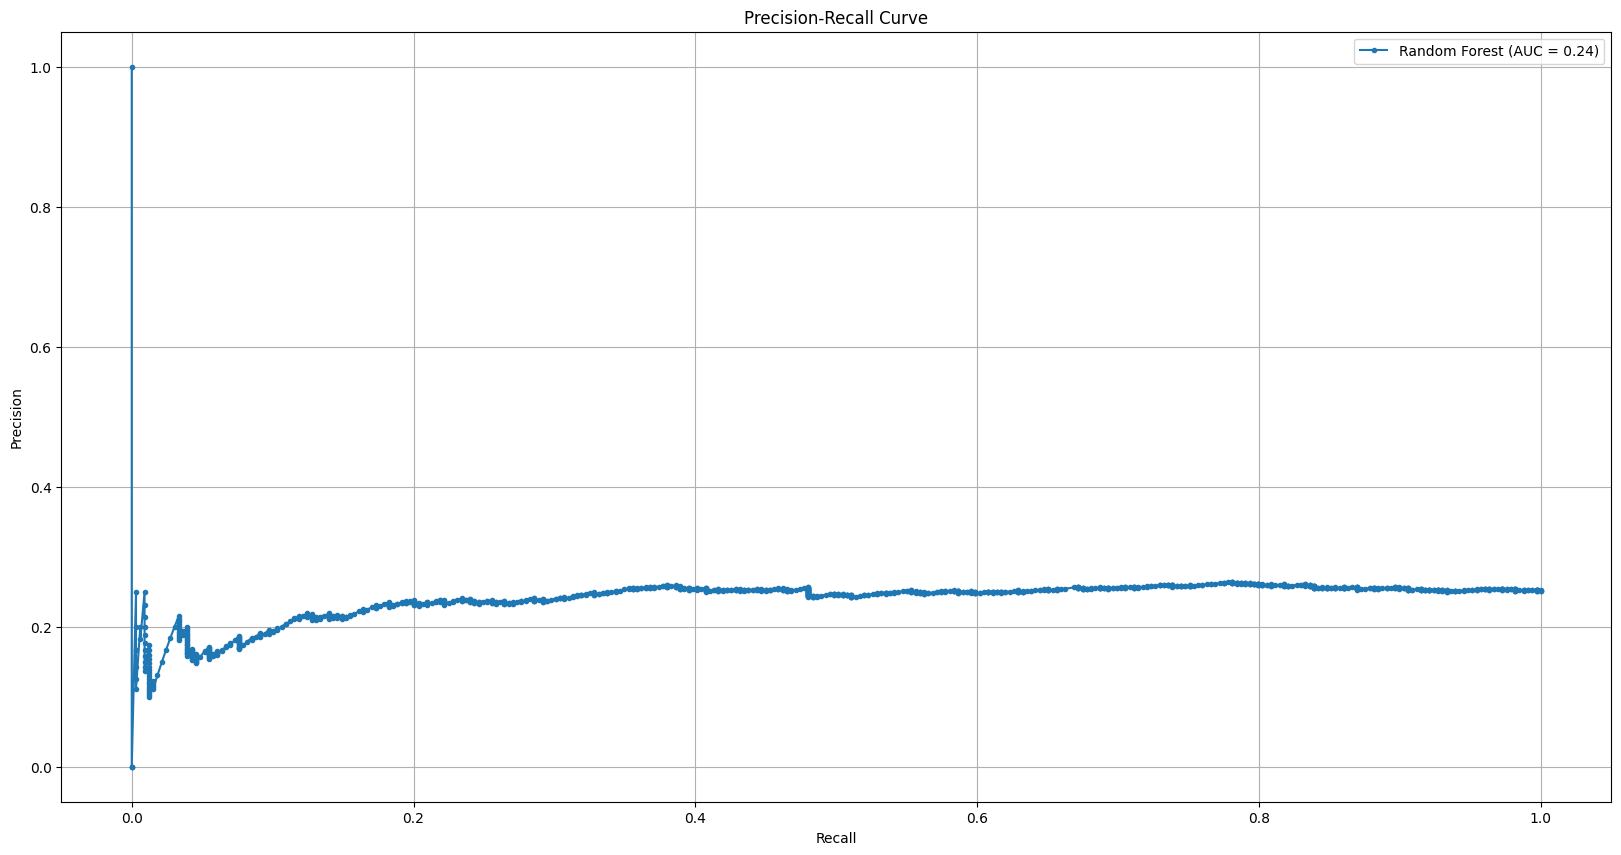

In [30]:
precision, recall, thresholds = precision_recall_curve(predictions['y_true'], predictions['binary_pred'])
pr_auc = auc(recall, precision)
# Plotear la curva de precisión/recall
plt.figure(figsize=(20, 10))

plt.plot(recall, precision, marker='.', label=f'Random Forest (AUC = {pr_auc:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.grid()
plt.show()

In [31]:
len(thresholds)

1302

In [32]:
predictions.y_true.value_counts() * 0.01

y_true
0.0    9.79
1.0    3.29
Name: count, dtype: float64

In [33]:
threshold = 0.47
preds = np.where(
    (predictions['binary_pred']<=threshold),
    0, 
    1
)

print(classification_report(predictions.y_true, preds))

              precision    recall  f1-score   support

         0.0       0.77      0.17      0.28       979
         1.0       0.26      0.85      0.39       329

    accuracy                           0.34      1308
   macro avg       0.51      0.51      0.33      1308
weighted avg       0.64      0.34      0.31      1308



In [34]:
predictions[predictions['proba']>threshold]

,y_true,y_pred,proba,binary_pred
3,1.0,0.0,0.514719,0.485281
22,0.0,1.0,0.500932,0.500932
26,1.0,1.0,0.522613,0.522613
27,0.0,1.0,0.506141,0.506141
28,0.0,1.0,0.505070,0.505070
...,...,...,...,...
6198,0.0,0.0,0.564878,0.435122
6200,0.0,0.0,0.521777,0.478223
6201,1.0,0.0,0.552247,0.447753
6202,0.0,1.0,0.518643,0.518643


In [35]:
predictions.head(50)

,y_true,y_pred,proba,binary_pred
3,1.0,0.0,0.514719,0.485281
22,0.0,1.0,0.500932,0.500932
26,1.0,1.0,0.522613,0.522613
27,0.0,1.0,0.506141,0.506141
28,0.0,1.0,0.505070,0.505070
29,0.0,1.0,0.505811,0.505811
30,1.0,1.0,0.501364,0.501364
31,1.0,0.0,0.506807,0.493193
32,0.0,0.0,0.503916,0.496084
33,0.0,0.0,0.503946,0.496054


In [36]:


from sklearn.metrics import precision_score, f1_score, recall_score



tickers = config["tickers"] 
tickers

predictions = predictions.sort_values(by='fecha')
true_values = true_values.sort_values(by='fecha')


# renombro las columnas
column_names = {}
for column in predictions.columns:
    if column != 'fecha':
        column_names[column] = f'{column}_preds'

predictions = predictions.rename(columns=column_names)

column_names = {}
for column in true_values.columns:
    if column != 'fecha':
        column_names[column] = f'{column}_true'

true_values = true_values.rename(columns=column_names)
performance = pd.concat(
    [
        predictions,
        true_values
    ], axis=1, join="inner"
)

recall_list = []
f1_list = []
precision_list = []

for ticker in tickers:
    y_true = performance[performance[f'{ticker}_true'].notna()][f'{ticker}_true']
    y_pred = performance[performance[f'{ticker}_preds'].notna()][f'{ticker}_preds']
    
    precision = precision_score(y_true, y_pred, average='weighted')
    recall = recall_score(y_true, y_pred, average='weighted')
    f1 = f1_score(y_true, y_pred, average='weighted')

    # print(classification_report(performance[f'{ticker}_true'], performance[f'{ticker}_preds'], target_names=target_names))
    
    precision_list.append(precision)
    recall_list.append(recall)
    f1_list.append(f1)
    

KeyError: 'fecha'

# Grafico de velas

In [ ]:
# import plotly.graph_objects as go

# fig = go.Figure(data=[go.Candlestick(x=prices['Date'],
#                 open=prices['Open'],
#                 high=prices['High'],
#                 low=prices['Low'],
#                 close=prices['Close'])])

# fig.update_layout(
#     title=f"{config['ticker']}",
#     yaxis_title=f"{config['ticker']} Stock"
# )

# fig.show()

# Estrategia

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Datos de ejemplo
x_prices = pd.to_datetime(prices['Date'])
y_prices = prices['Close']  # Datos para la línea

x_buy = pd.to_datetime(buys['fecha'])
y_buy = buys['buy']  # Datos para el scatter plot

x_sell = pd.to_datetime(sells['date'])
y_sell = sells['sell']  # Datos para el scatter plot

x_wallet = pd.to_datetime(wallet['date'])
y_wallet = wallet['wallet']  # Datos para la línea

# Crear una figura y ejes
fig, ax = plt.subplots(figsize=(20, 10))

# Agregar la línea
ax.plot(x_prices, y_prices, label='market', color='black')

ax.plot(x_wallet, y_wallet, label='wallet', color='purple')

# Agregar el scatter plot
ax.scatter(x_buy, y_buy, label='compras', color='cyan', marker='>')

ax.scatter(x_sell, y_sell, label='Ventas', color='red', marker='o')

# Etiquetas de los ejes y leyenda
ax.set_xlabel('Fechas')
ax.set_ylabel('Precios')
ax.legend()

# Mostrar el gráfico
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Datos de ejemplo
x_prices = pd.to_datetime(prices['Date'])
y_prices = prices['Close']  # Datos para la línea

x_buy = pd.to_datetime(buys['date'])
y_buy = buys['buy']  # Datos para el scatter plot

x_sell = pd.to_datetime(sells['date'])
y_sell = sells['sell']  # Datos para el scatter plot

# Crear una figura y ejes
fig, ax = plt.subplots(figsize=(20, 10))

# Agregar la línea
ax.plot(x_prices, y_prices, label='market', color='black')

# Agregar el scatter plot
ax.scatter(x_buy, y_buy, label='compras', color='cyan', marker='>')

ax.scatter(x_sell, y_sell, label='Ventas', color='red', marker='o')

# Etiquetas de los ejes y leyenda
ax.set_xlabel('Fechas')
ax.set_ylabel('Precios')
ax.legend()

# Mostrar el gráfico
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import auc

print('Area bajo la curva: ', auc(wallet.index, wallet['wallet']))

# Datos de ejemplo
x_prices = pd.to_datetime(wallet['date'])
y_prices = wallet['wallet']  # Datos para la línea


# Crear una figura y ejes
fig, ax = plt.subplots(figsize=(20, 10))

# Agregar la línea
ax.plot(x_prices, y_prices, label='Wallet', color='blue')

# Etiquetas de los ejes y leyenda
ax.set_xlabel('Fechas')
ax.set_ylabel('Precios')
ax.legend()

# Mostrar el gráfico
plt.show()


# Modelo

In [ ]:
predictions.sort_values(by='fecha')

In [ ]:
true_values.sort_values(by='fecha')

In [ ]:
accuracy_score(predictions[predictions['YPF'].notna()].YPF, true_values[true_values['YPF'].notna()].YPF)

In [ ]:
threshold_down = 0.5
threshold_up = 0.5

df_predictions = performance[(performance['y_pred']<threshold_down) | (performance['y_pred']>threshold_up)].copy()
df_predictions['y_pred'] = np.where(df_predictions['y_pred']<threshold_down, 0, df_predictions['y_pred'])
df_predictions['y_pred'] = np.where(df_predictions['y_pred']>threshold_up, 1, df_predictions['y_pred'])

print(accuracy_score(df_predictions.y_true, df_predictions.y_pred))
plot_confusion_matrix(df_predictions.y_true, df_predictions.y_pred, classes=[0,1], cmap=plt.cm.Reds)

In [ ]:
threshold_down = 0.1
threshold_up = 0.9

df_predictions = performance[(performance['y_pred']<threshold_down) | (performance['y_pred']>threshold_up)].copy()
df_predictions['y_pred'] = np.where(df_predictions['y_pred']<threshold_down, 0, df_predictions['y_pred'])
df_predictions['y_pred'] = np.where(df_predictions['y_pred']>threshold_up, 1, df_predictions['y_pred'])

print(accuracy_score(df_predictions.y_true, df_predictions.y_pred))
plot_confusion_matrix(df_predictions.y_true, df_predictions.y_pred, classes=[0,1], cmap=plt.cm.Reds)

In [ ]:
plt.hist(performance.y_pred, color='lightgreen', ec='black', bins=50)
plt.show()

In [ ]:
buys = buys.rename(columns={''})

In [ ]:
operations = pd.concat([buys[buys['YPF'].notna()], sells[sells['YPF'].notna()]], axis=1, join="inner")[['fecha','YPF']]
operations

In [ ]:
operations['positive'] = np.where(operations['buy']>operations['sell'], 0, 1)
operations['Profit'] = operations['sell'] - operations['buy'] 
operations['positive'].value_counts()